In [2]:
#importing necessary libraries 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from numpy import unique,argmax

In [4]:
# loading the MNIST dataset
(X_train,y_train),(X_test,y_test)= keras.datasets.mnist.load_data()

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [6]:
# reshaping the training and test dataset
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

2


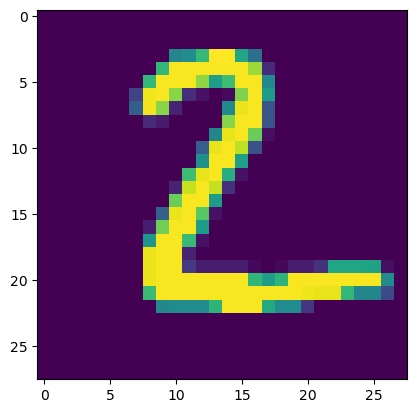

In [7]:
plt.imshow(X_test[1])
print(y_test[1])

In [8]:
# normalizing the values of pixels of images 
X_train = X_train/255
X_test = X_test/255

In [9]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [10]:
# determining the shape of input images
img_shape = X_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [11]:
# defining the model
model = Sequential()
inp_shape = (28,28, 1)
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = inp_shape))
model.add(MaxPool2D(2,2))
model.add(Conv2D(48, (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation ='relu'))
model.add(Dense(10, activation ='softmax'))

In [12]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [13]:
# fitting the model
model.compile(optimizer='Adam', loss = 'sparse_categorical_crossentropy', metrics =['accuracy'])

In [14]:
x = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 81s 42ms/step - loss: 0.1691 - accuracy: 0.9473
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0668 - accuracy: 0.9791
Epoch 3/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0501 - accuracy: 0.9844
Epoch 4/10
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0420 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0346 - accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0319 - accuracy: 0.9900
Epoch 7/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0275 - accuracy: 0.9909
Epoch 8/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0252 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0250 - accuracy: 0.9918
Epoch 10/10
1875/1875 [==============================] - 79s 42m

In [15]:
#Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100}')

313/313 [==============================] - 5s 14ms/step - loss: 0.0223 - accuracy: 0.9928
Accuracy: 99.27999973297119


In [16]:
model.predict(X_test)

313/313 [==============================] - 4s 13ms/step


array([[3.57555836e-13, 1.42114390e-10, 1.08173444e-11, ...,
        1.00000000e+00, 1.75348473e-12, 3.75180720e-10],
       [8.24075086e-10, 3.25080540e-09, 1.00000000e+00, ...,
        2.38075429e-13, 8.46185275e-12, 3.27099073e-15],
       [2.80401240e-11, 9.99999642e-01, 3.26641575e-10, ...,
        2.89699472e-07, 5.14007015e-09, 7.44384068e-11],
       ...,
       [3.42289199e-19, 7.95273916e-12, 1.08347965e-14, ...,
        5.50282086e-12, 4.49166149e-10, 1.50040946e-09],
       [2.13531498e-10, 6.57486435e-13, 7.67316915e-14, ...,
        1.26372179e-13, 6.19740866e-04, 5.10761988e-11],
       [4.90534335e-10, 3.95429045e-12, 1.40809353e-09, ...,
        9.21210617e-18, 7.62238536e-12, 6.21720277e-15]], dtype=float32)

In [17]:
predicted_probabilities = model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=1)



313/313 [==============================] - 4s 13ms/step


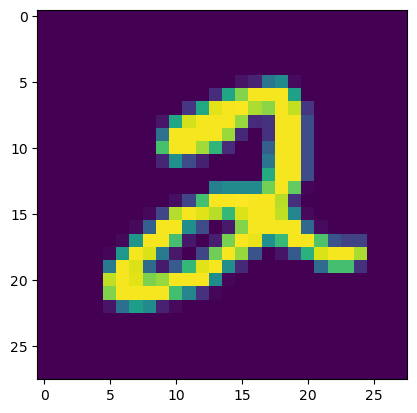

In [19]:
plt.imshow(X_train[5])

In [ ]:
pip install tensorflow